In [1]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [2]:
sns.set()

In [3]:
df = sns.load_dataset('titanic')  

In [6]:
class DataPreprocessing:
    
    def __init__(self, df):
        self.df = df
    
    def numericalFeatures(self):
        return self.df.select_dtypes(include = ['number']) 
    
    def categoricalFeatures(self):
        return self.df.select_dtypes(include = ['object']) 
    
    def showMissingValues(self):
        plt.figure(figsize = (12, 4))
        sns.heatmap(self.df.isnull(), cmap= "viridis", cbar = False, yticklabels = False)
        plt.show()

    def detectOutliers(self, nbline = 2, nbcolumn = 3):
        plt.figure(figsize=(13.5, 4))
        for col in enumerate(self.df.select_dtypes(include = ['int64', 'float64'])):
            plt.subplot(nbline, nbcolumn, col[0] + 1)
            sns.boxplot(y = col[1], data = df)
        plt.show()  
        
    def correlationMatrix(self):
        plt.figure(figsize=(14, 5))
        sns.heatmap(self.df.select_dtypes(['number']).corr().round(2), 
                    annot = True, 
                    cmap = 'coolwarm', 
                    cbar = True, 
                    annot_kws = {'fontsize': 10},
                    vmin = -1,
                    vmax = 1,
                    lw = .4,
                    # mask = np.triu(np.ones_like(df.select_dtypes(['number']).corr()))
                    )
        plt.title("Matrice de correlation")
        plt.show()
    
    def clusterMap(self):
        sns.clustermap(
                self.df.select_dtypes(['number']).corr(),
                figsize =(10, 4), 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'fontsize': 12},
                vmin = -1,
                vmax = 1,
                lw = .2,
                row_cluster = False,
                dendrogram_ratio = (.1, .2),
                cbar_pos = (0, .2, .03, .4)
            )
        plt.savefig('clustermap.png')
        plt.show()  
        
    def preprocessing(self):
        y = self.df.survived
        X = self.df.drop(['survived',
                'embarked',
                'class',
                'who',
                'adult_male',
                'alive'], axis = 'columns')
        
        Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                        y,
                                                        test_size = .2,
                                                        random_state = 0)
        
        num_cols = Xtrain.select_dtypes(include = ['int64','float64']).columns
        cat_cols = Xtrain.select_dtypes(include = 'object').columns 
    
        num_pipeline = make_pipeline(
                                SimpleImputer(strategy = 'median'),
                                RobustScaler(),
                                )

        cat_pipeline = make_pipeline(
                        SimpleImputer(strategy = 'most_frequent'),
                        OneHotEncoder(handle_unknown = 'ignore', drop = 'if_binary')
                        )
        full_pipeline = make_column_transformer(
                                (num_pipeline, num_cols),
                                (cat_pipeline, cat_cols)
                                )  
        return make_pipeline(full_pipeline, LogisticRegression()).fit(Xtrain, ytrain)           

In [9]:
processor = DataPreprocessing(df)

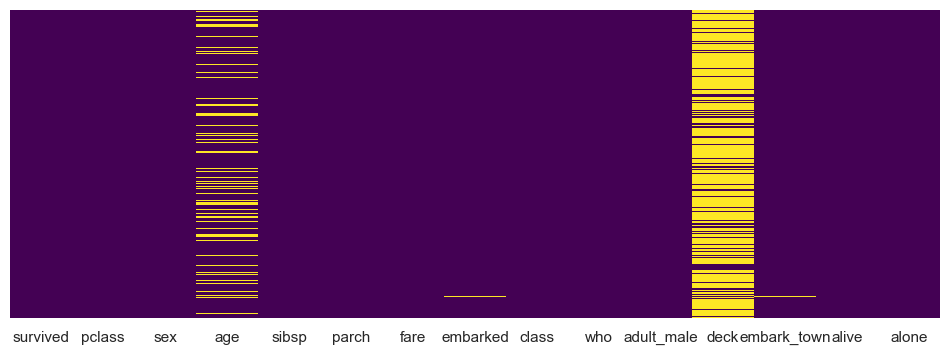

In [11]:
processor.showMissingValues()

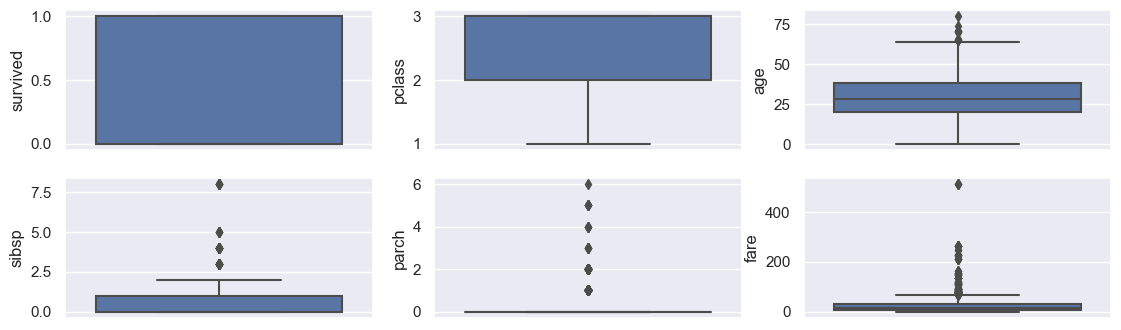

In [12]:
processor.detectOutliers()


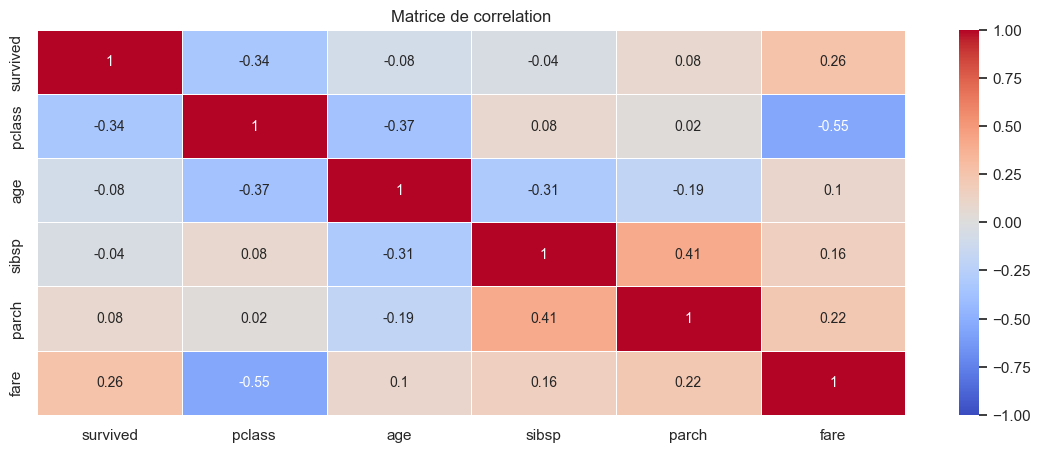

In [13]:
processor.correlationMatrix()

In [16]:
processor.numericalFeatures().head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [17]:
processor.categoricalFeatures().head()

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
